**Course Code: CSE 4632**

**Course Name: Digital Signal Processing Lab**

**Lab No: 2**

**Name:** Md Farhan Ishmam

**ID:** 180041120

**Lab Group: P** 

Importing libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#Task-1
**Explanation:** In this task, I have to take a sinusoid signal and quantize it using b bits. At first, I defined a necesseary helper function, `find_nearest(array, value)` that will take the lower value of the quantization values. Then I created the orignal signal and plotted it using `plt.stem()`.

In the next part, I defined the quantization function, `quantize(t, y, b)`. The function takes time t value, y output signal value and bit b value as parameters. The function takes the y value and appends it to an array as the nearest quantized value, and returns the array at the end. Finally, I used a for loop to produce the graph for all the bits using `plt.subplot()`.

In [87]:
def find_nearest(array, value):
    array = np.array(array)
    lower_array = array[(array - value)<=0]     #takes all the elements of the array lower than the value
    idx = (lower_array-value).argmax()                #takes the maximum value from the array of differences
    return lower_array[idx]

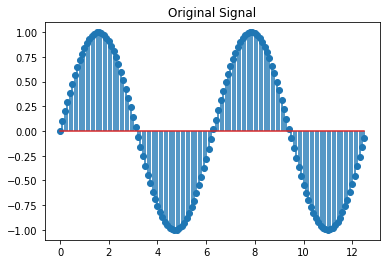

In [88]:
t = np.arange(0.0,4.0*np.pi, 0.1)
y = np.sin(t)
plt.stem(t,y,use_line_collection = True)
_ = plt.title('Original Signal')

In [89]:
def quantize(t, y, bit):
  y_quan = list()
  levels = np.power(2,bit)
  level_array = np.linspace(-1,1,int(levels))
  for sample in y:
    quan_value = find_nearest(level_array, sample)
    quan_value = ((quan_value+1)/2)*levels
    y_quan.append(quan_value)
  return y_quan

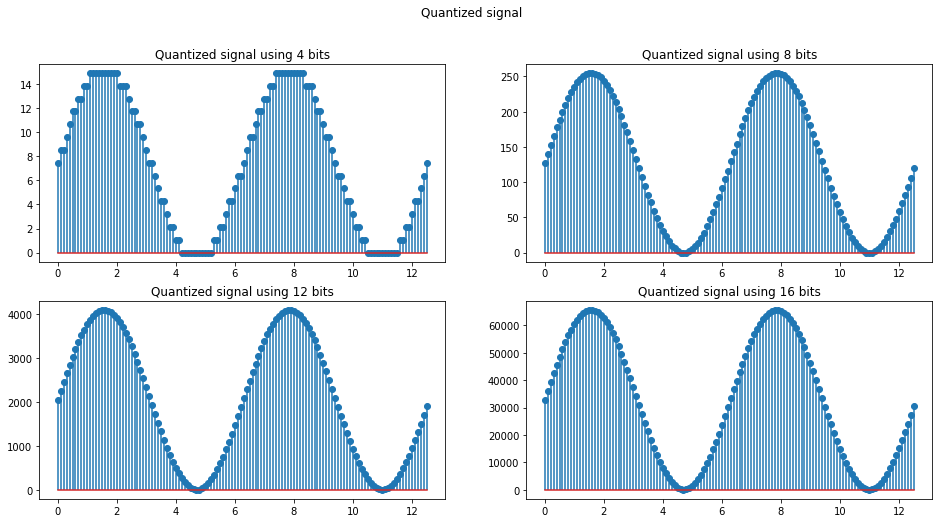

In [90]:
fig = plt.figure(figsize=(16,8))
fig.suptitle('Quantized signal')
gs  = gridspec.GridSpec(2, 2)
a = list()

bits = np.array([4,8,12,16])
for i in range(4):
  bit = bits[i]
  y_quan = quantize(t,y,bit)
  a.append(plt.subplot(gs[i]))
  a[i].stem(t,y_quan,use_line_collection=True)
  _ = a[i].set_title('Quantized signal using {} bits'.format(bit))

#Task-2
**Explanation:** In this task, I have to create three functions to produce elementary signals. I used a python dictionary, `dict()` to represent the signal. For `delta(n)` only the 0th index was set to 1. For `unity(n)`, the negative values were set to zero, and the non-negative values are set to 1. For the `unitramp(n)` the postive values are set to index values and the negative values are set to 0.

In [103]:
def delta(n):
  signal = dict()
  for i in range(n+1):
    signal[-i] = 0
    signal[i] = 0
  signal[0] = 1
  return signal

In [104]:
def unity(n):
  signal = dict()
  for i in range(n+1):
    signal[-i] = 0
    signal[i] = 1
  return signal

In [105]:
def unitramp(n):
  signal = dict()
  for i in range(n+1):
    signal[-i] = 0
    signal[i] = i
  return signal

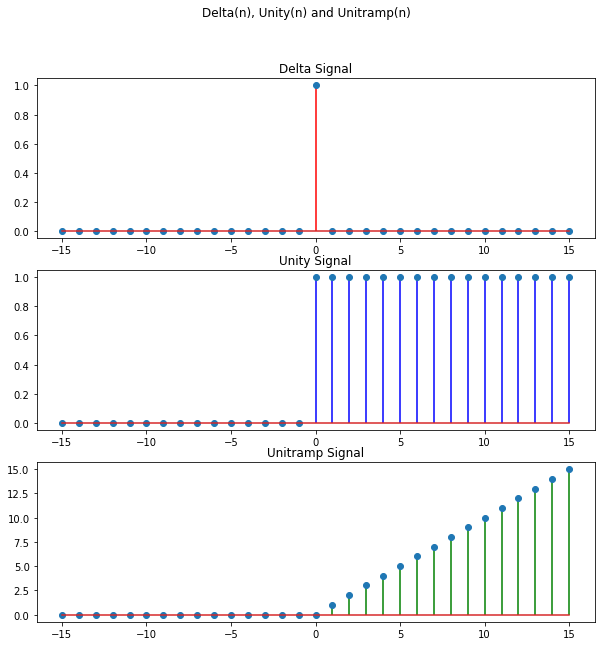

In [106]:
delta_signal = delta(15)
unity_signal = unity(15)
unit_ramp_signal = unitramp(15)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Delta(n), Unity(n) and Unitramp(n)')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)
a3 = plt.subplot(gs[2])

x1 = list(delta_signal.keys())
y1 = list(delta_signal.values())
a1.stem(x1,y1,'r',use_line_collection=True)
_ = a1.set_title('\nDelta Signal')

x2 = list(unity_signal.keys())
y2 = list(unity_signal.values())
a2.stem(x2,y2, 'b',use_line_collection=True)
_ = a2.set_title('Unity Signal')

x3 = list(unit_ramp_signal.keys())
y3 = list(unit_ramp_signal.values())
a3.stem(x3,y3, 'g',use_line_collection=True)
_ = a3.set_title('Unitramp Signal')

#Task-3
**Explanation:** In this task, I have created a function that takes a signal and divides it into even and odd signals. I looped over the signal values and set the negative values which don't exist. Then I computed the even signal by summing the positive and negative index values and dividing by 2. Then I computed the odd signal by subtracting the negative index from postive index and dividing the resultant by 2. Finally, I plotted the original, odd, and even signal in the same plot using `plt.subplot()`.

In [95]:
def evenOddDivide(signal):
  sigEven = dict()
  sigOdd = dict()
  for sample in signal.items():
    key = sample[0]
    value = sample[1]
    if -key not in signal:
      signal[-key] = 0
    sigEven[key] = (signal[key]+signal[-key])/2
    sigOdd[key] = (signal[key]-signal[-key])/2

  fig = plt.figure(figsize=(10,10))
  fig.suptitle('Division into Even and Odd signals')
  gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
  a1 = plt.subplot(gs[0])
  a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)
  a3 = plt.subplot(gs[2],sharex = a1, sharey = a1)
  
  x1 = list(signal.keys())
  y1 = list(signal.values())
  a1.stem(x1,y1,'r',use_line_collection=True)
  _ = a1.set_title('Original Signal\n')

  x2 = list(sigEven.keys())
  y2 = list(sigEven.values())
  a2.stem(x2,y2, 'b',use_line_collection=True)
  _ = a2.set_title('Even Signal')

  x3 = list(sigOdd.keys())
  y3 = list(sigOdd.values())
  a3.stem(x3,y3, 'g',use_line_collection=True)
  _ = a3.set_title('Odd Signal')

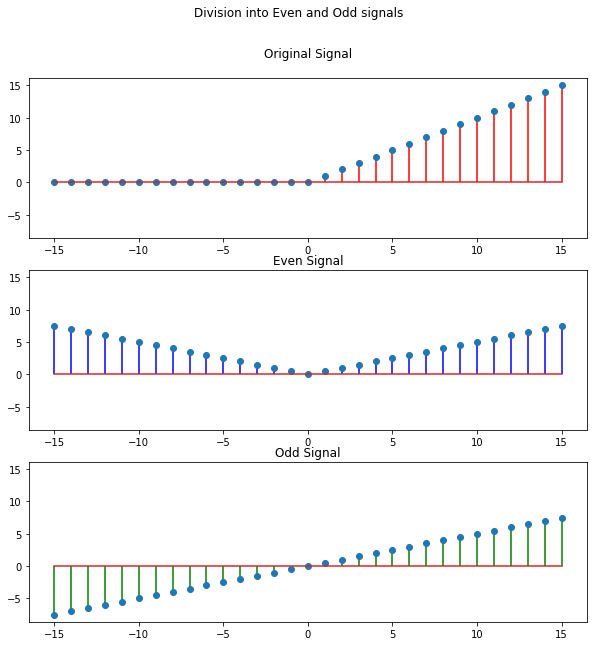

In [96]:
#Calling the function with a unitramp(15)
evenOddDivide(unitramp(15))

#Task-4
**Explanation:** In this task, I have created the `sigshift(n, k)` function that takes a range of numbers n, and a shift value k as parameter, and returns the shifted signal. I added the shift value to each element of my signal using a loop, and returned the output signal.

In [97]:
def sigshift(signal, shift_value):
  out_signal = dict()
  for sample in signal.items():
    key = sample[0]
    value = sample[1]
    out_signal[key+shift_value] =  value
  return out_signal

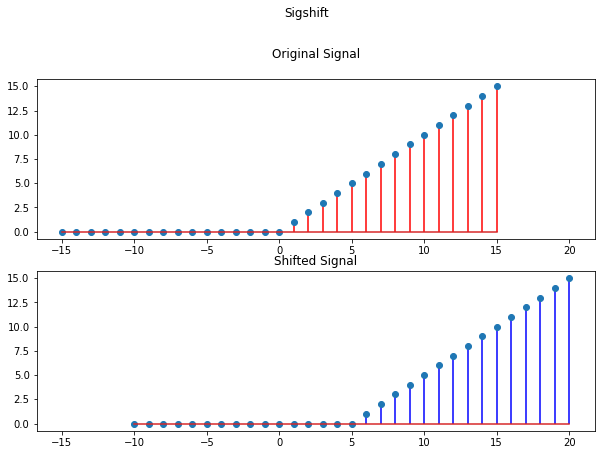

In [98]:
signal = unitramp(15)
shifted_signal = sigshift(signal, 5)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Sigshift')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)

x1 = list(signal.keys())
y1 = list(signal.values())

a1.stem(x1,y1,'r',use_line_collection=True)
_ = a1.set_title('Original Signal\n')

x2 = list(shifted_signal.keys())
y2 = list(shifted_signal.values())
a2.stem(x2,y2, 'b',use_line_collection=True)
_ = a2.set_title('Shifted Signal')

#Task-5

**Explanation:** In this task I have created a `sigfold(signal)` function that takes a signal as input parameter and returns the folded signal. I used for loop to interate over the input signal, and assigned the value to the negative keys. Then the original and folded signal is plotted using `plt.subplot()`.

In [99]:
def sigfold(signal):
  out_signal = dict()
  for sample in signal.items():
    key = sample[0]
    value = sample[1]
    out_signal[-key] =  value
  return out_signal

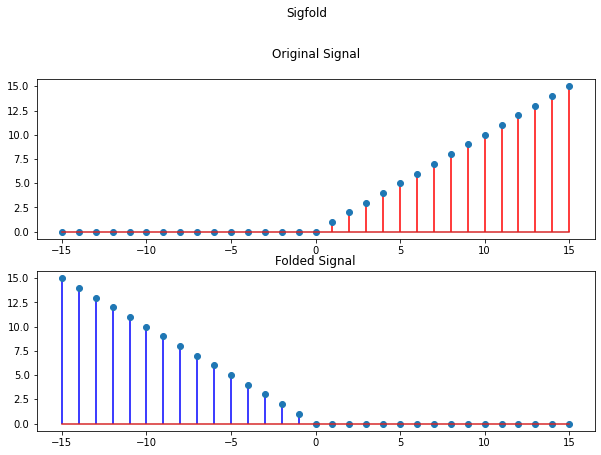

In [100]:
signal = unitramp(15)
folded_signal = sigfold(signal)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Sigfold')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)

x1 = list(signal.keys())
y1 = list(signal.values())

a1.stem(x1,y1,'r',use_line_collection=True)
_ = a1.set_title('Original Signal\n')

x2 = list(folded_signal.keys())
y2 = list(folded_signal.values())
a2.stem(x2,y2, 'b',use_line_collection=True)
_ = a2.set_title('Folded Signal')

#Task-6
**Explanation:** In this task, I have created a `downsample(signal, d)` function that takes a signal, and a downsampling rate d as parameters and return the downsampled signal. The signals are represented using `dict()`. To downsample, selected values that are divisible by the downsampling value are added to the output signal.

In [101]:
def downsample(signal, d):
  out_signal = dict()
  for sample in signal.items():
    key = sample[0]
    value = sample[1]
    if key%d == 0:
      out_signal[key] =  value
  return out_signal

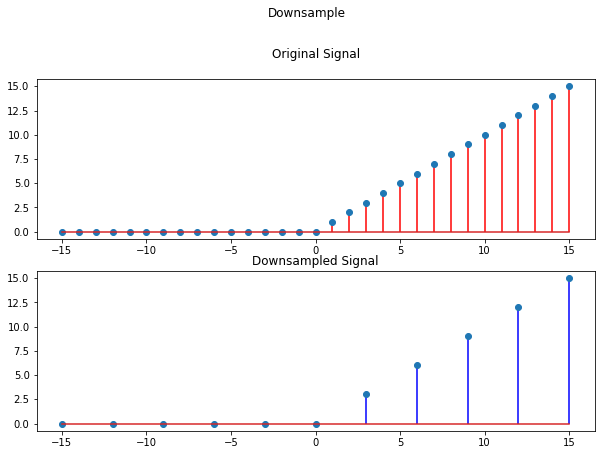

In [102]:
signal = unitramp(15)
downsampled_signal = downsample(signal, 3)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Downsample')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)

x1 = list(signal.keys())
y1 = list(signal.values())

a1.stem(x1,y1,'r',use_line_collection=True)
_ = a1.set_title('Original Signal\n')

x2 = list(downsampled_signal.keys())
y2 = list(downsampled_signal.values())
a2.stem(x2,y2, 'b',use_line_collection=True)
_ = a2.set_title('Downsampled Signal')

#Task-7
**Explanation:** In this task, I have created the `sigadd(x1, x2)` that takes two signals represented by x1, and x2 as input and returned their added values. To do so, I looped over one signal, and added the value to the other signal. 

In [170]:
def sigadd(x1, x2):
  out_signal = x1.copy()
  for sample in x2.items():
    key = sample[0]
    value = sample[1]
    if key in out_signal:
      out_signal[key] +=  value
    else:
      out_signal[key] = value
  return out_signal

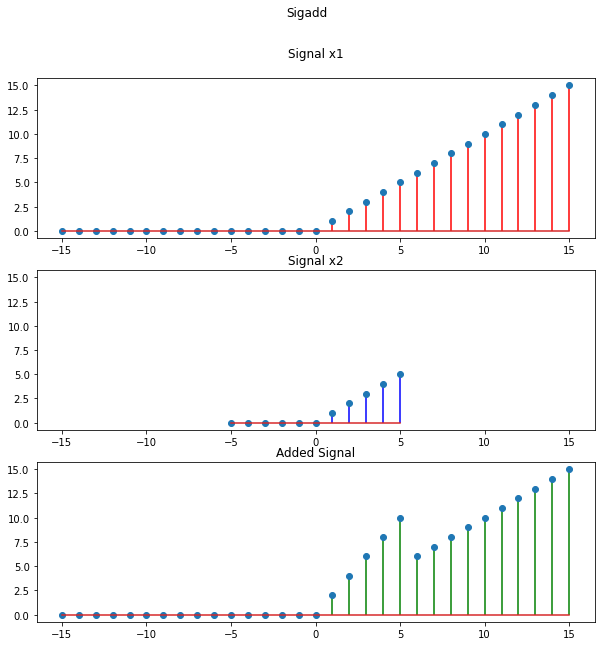

In [179]:
sig_x1 = unitramp(15)
sig_x2 = unitramp(5)
added_signal = sigadd(sig_x1,sig_x2)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Sigadd')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)
a3 = plt.subplot(gs[2],sharex = a1, sharey = a1)

x1 = list(sig_x1.keys())
y1 = list(sig_x1.values())

a1.stem(x1,y1,'r',use_line_collection=True)
_ = a1.set_title('Signal x1\n')

x2 = list(sig_x2.keys())
y2 = list(sig_x2.values())

a2.stem(x2,y2, 'b',use_line_collection=True)
_ = a2.set_title('Signal x2')

x3 = list(added_signal.keys())
y3 = list(added_signal.values())

a3.stem(x3,y3, 'g',use_line_collection=True)
_ = a3.set_title('Added Signal')

#Task-8

**Explanation:** In this task, I have created the `sigmult(x1, x2)` function that takes two signal values and multiples them. I did this by looping over one of the signals and multiplying it with that corresponding index value of the other signal.

In [180]:
def sigmult(x1, x2):
  out_signal = dict()
  for sample in x2.items():
    key = sample[0]
    value = sample[1]
    if key in x1:
      out_signal[key] =  value*x1[key]
    else:
      out_signal[key] = 0
  return out_signal

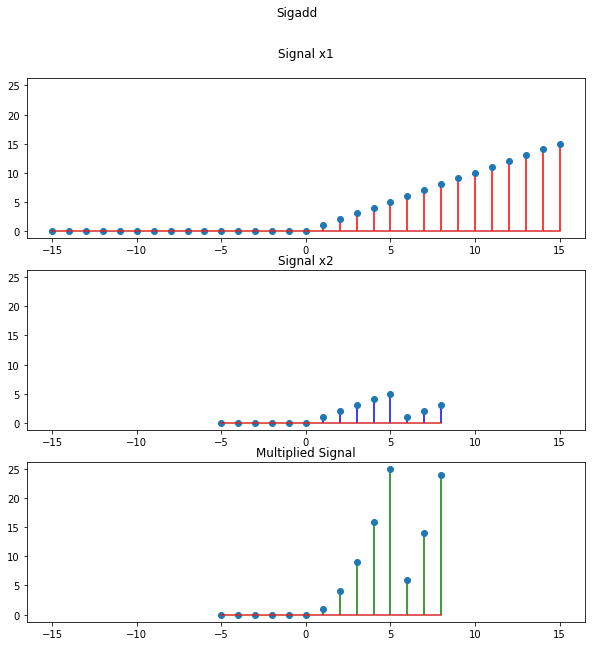

In [184]:
sig_x1 = unitramp(15)
sig_x2 = sigadd(unitramp(5), sigshift(unitramp(3),5))
mult_signal = sigmult(sig_x1,sig_x2)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Sigadd')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1],sharex = a1, sharey = a1)
a3 = plt.subplot(gs[2],sharex = a1, sharey = a1)

x1 = list(sig_x1.keys())
y1 = list(sig_x1.values())

a1.stem(x1,y1,'r',use_line_collection=True)
_ = a1.set_title('Signal x1\n')

x2 = list(sig_x2.keys())
y2 = list(sig_x2.values())

a2.stem(x2,y2, 'b',use_line_collection=True)
_ = a2.set_title('Signal x2')

x3 = list(mult_signal.keys())
y3 = list(mult_signal.values())

a3.stem(x3,y3, 'g',use_line_collection=True)
_ = a3.set_title('Multiplied Signal')